# **Project Name: Movie recommendation system**

Contribution - Dinesh Halder

# **Project Overview**


### **1. Introduction**
This project aims to build a **Movie Recommendation System** using **Machine Learning techniques**. The system leverages both **Collaborative Filtering (SVD)** and **Content-Based Filtering (KNN)** to suggest movies based on user preferences and movie similarities.

### **2. Datasets Used**
- **movie_metadata.csv**: Contains movie details like **movieId, title, genres**.
- **ratings.csv**: Contains user ratings with **userId, movieId, rating**.

### **3. Data Preprocessing**
- **Handling Missing Values**: Dropped missing values to ensure data quality.
- **Data Type Consistency**: Converted 'movieId' to **string** in both datasets.
- **Extracting Genres**: Parsed JSON-like genre data to extract meaningful genre names.
- **Merging Datasets**: Combined movies and ratings to facilitate analysis.

### **4. Exploratory Data Analysis (EDA)**
- **Top 10 Highest Rated Movies**: Identified movies with the highest average ratings (with at least 50 ratings).
- **Ratings Distribution**: Visualized the frequency of different ratings.
- **Top 10 Most Rated Movies**: Analyzed movies with the most user reviews.
- **Genre Popularity**: Counted and visualized the most common movie genres.

### **5. Model Building**
#### **A) Collaborative Filtering (SVD - Singular Value Decomposition)**
- **User-Movie Matrix**: Created a matrix where users rate movies.
- **SVD Decomposition**: Reduced dimensionality to capture user-movie interaction patterns.
- **Prediction and Evaluation**: Used **Root Mean Squared Error (RMSE)** to assess model accuracy.

#### **B) Content-Based Filtering (KNN - K-Nearest Neighbors)**
- **Cosine Similarity**: Trained KNN on **SVD-transformed movie features**.
- **Movie Similarity Search**: Finds similar movies based on feature distances.

### **6. Movie Recommendation System**
- **User Input**: Accepts a movie title from the user.
- **Retrieves Similar Movies**: Uses the trained **KNN model** to suggest **5 most similar movies**.
- **Example Usage**: If the user inputs "Toy Story," the system outputs similar movies.

### **7. Model Evaluation**
- **SVD RMSE Score**: Used RMSE to measure the performance of the **Collaborative Filtering model**.
- **KNN Effectiveness**: Evaluated similarity accuracy through sample movie recommendations.

### **8. Conclusion**
This project successfully integrates **Collaborative Filtering (SVD)** and **Content-Based Filtering (KNN)** into a hybrid recommendation system. It provides meaningful recommendations by leveraging **user behavior and movie similarities**.



# **EDA**

## **1. Know Your Data**

### **Import Libraries**

In [57]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

### **Dataset Loading**

In [58]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Link and load data set

movies= pd.read_csv("/content/drive/MyDrive/project internship/Movie Recommender Systems/movies_metadata.csv",encoding = "ISO-8859-1")
ratings= pd.read_csv("/content/drive/MyDrive/project internship/Movie Recommender Systems/ratings_small.csv",encoding = "ISO-8859-1")

<ipython-input-59-ab3adcced57e>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies= pd.read_csv("/content/drive/MyDrive/project internship/Movie Recommender Systems/movies_metadata.csv",encoding = "ISO-8859-1")


### **Dataset Overview**

In [60]:
display(movies.head())
display(ratings.head())

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [61]:
# column names
print(movies.columns.tolist())
print(ratings.columns.tolist())

['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
['userId', 'movieId', 'rating', 'timestamp']


In [62]:
num_rows, num_cols= movies.shape
print(f"----Movies----")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

num_rows, num_cols= ratings.shape
print(f"----Ratings----")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

----Movies----
Number of rows: 45466
Number of columns: 24
----Ratings----
Number of rows: 100004
Number of columns: 4


In [63]:
# Dataset information

print(movies.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

## **2. Data Wrangling**

In [64]:
# We are going to take only important attributes of the movie dataset
movies= movies[['id','title','genres']]

In [65]:
movies.head(5)

,id,title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [66]:
# id changes to movieId
movies= movies.rename(columns= {'id':'movieId'})

In [67]:
# Extracting genres from JSON-like strings

def extract_genres(genre_str):
    try:
        genres_list= ast.literal_eval(genre_str)  # Convert string to a list of dictionaries
        return ', '.join([genre['name'] for genre in genres_list])  # Extract and join genre names
    except (ValueError, SyntaxError):
        return "Unknown"  # Return "Unknown" if there's an error

# Apply function to the 'genres' column
movies['genres']= movies['genres'].apply(extract_genres)


In [68]:
movies.head(5)

,movieId,title,genres
0,862,Toy Story,"Animation, Comedy, Family"
1,8844,Jumanji,"Adventure, Fantasy, Family"
2,15602,Grumpier Old Men,"Romance, Comedy"
3,31357,Waiting to Exhale,"Comedy, Drama, Romance"
4,11862,Father of the Bride Part II,Comedy


## **3. Understanding variables**

In [69]:
# Description

display(movies.describe())
display(ratings.describe())


,movieId,title,genres
count,45466,45460,45466
unique,45436,42277,4069
top,141971,Cinderella,Drama
freq,3,11,5000


,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [70]:
# unique value for each variable

for i in movies.columns.tolist():
  print(f"Total unique values in {i} is {movies[i].nunique()}")
print("--------------------------------------------------------------")
for i in ratings.columns.tolist():
  print(f"Total unique values in {i} is {ratings[i].nunique()}")


Total unique values in movieId is 45436
Total unique values in title is 42277
Total unique values in genres is 4069
--------------------------------------------------------------
Total unique values in userId is 671
Total unique values in movieId is 9066
Total unique values in rating is 10
Total unique values in timestamp is 78141


## **4. Data Vizualization, Storytelling & Experimenting with charts**

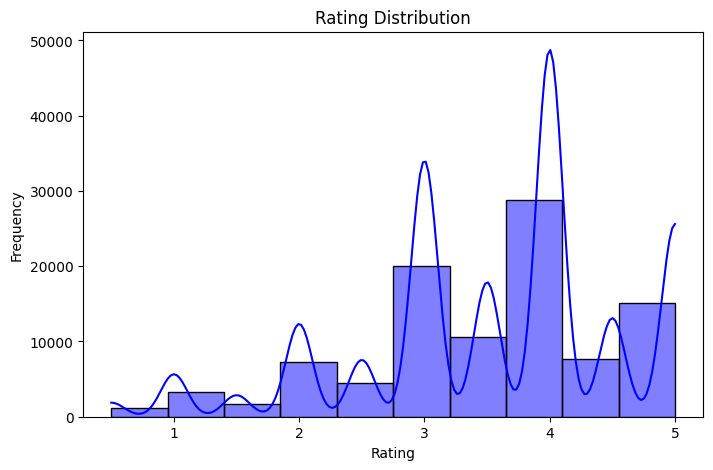

In [71]:
# rating distribution

plt.figure(figsize=(8,5))
sns.histplot(ratings["rating"], bins=10, kde= True, color="blue")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

<ipython-input-72-a1b0e25377ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:15], y=genre_counts.values[:15], palette='coolwarm')


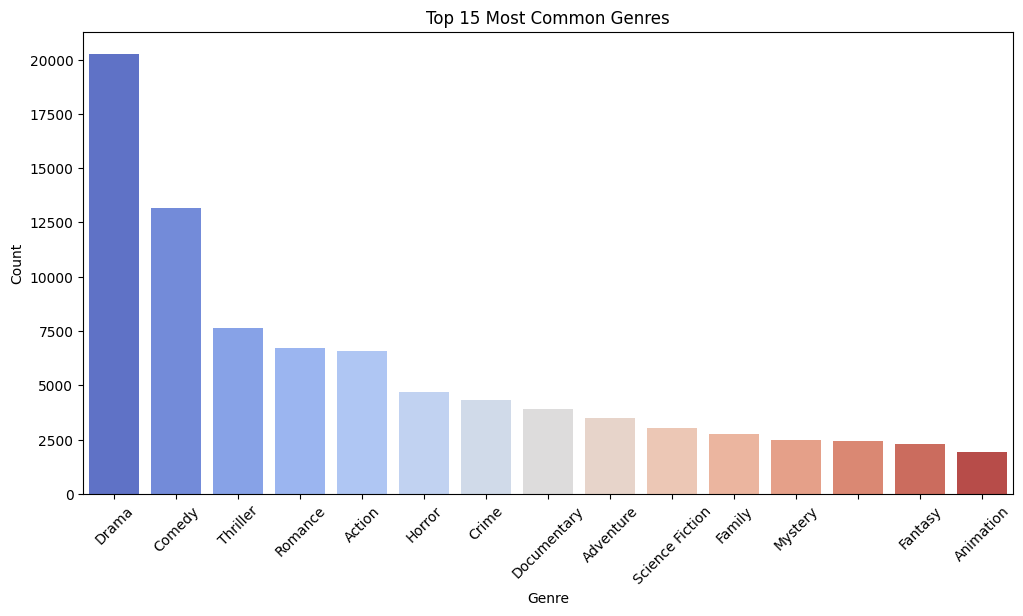

In [72]:
# Top Genres Count
genre_counts= movies['genres'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index[:15], y=genre_counts.values[:15], palette='coolwarm')
plt.title('Top 15 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Convert movieId to the same type in both DataFrames
ratings['movieId']= ratings['movieId'].astype(str)
movies['movieId']= movies['movieId'].astype(str)

In [74]:
# Merge Movies and Ratings Data
merged_df= ratings.merge(movies, on='movieId')

In [75]:
# Top 10 Highest Rated Movies
top_rated_movies= merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)[:10]
top_rated_movies= top_rated_movies.reset_index()

# Display Top 10 Rated Movies in Table Form
print("Top 10 Highest Rated Movies:")
print(top_rated_movies.to_string(index=False))

Top 10 Highest Rated Movies:
                           title  rating
                 The Celebration     5.0
                      The Wizard     5.0
  Mr. Magorium's Wonder Emporium     5.0
            Frank Herbert's Dune     5.0
                        The Game     5.0
The Garden of the Finzi-Continis     5.0
                  Duel of Hearts     5.0
                     The General     5.0
             Singin' in the Rain     5.0
              The Brothers Grimm     5.0


<ipython-input-76-bf5f4e52bf87>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies['title'], y=top_movies[0], palette='viridis')


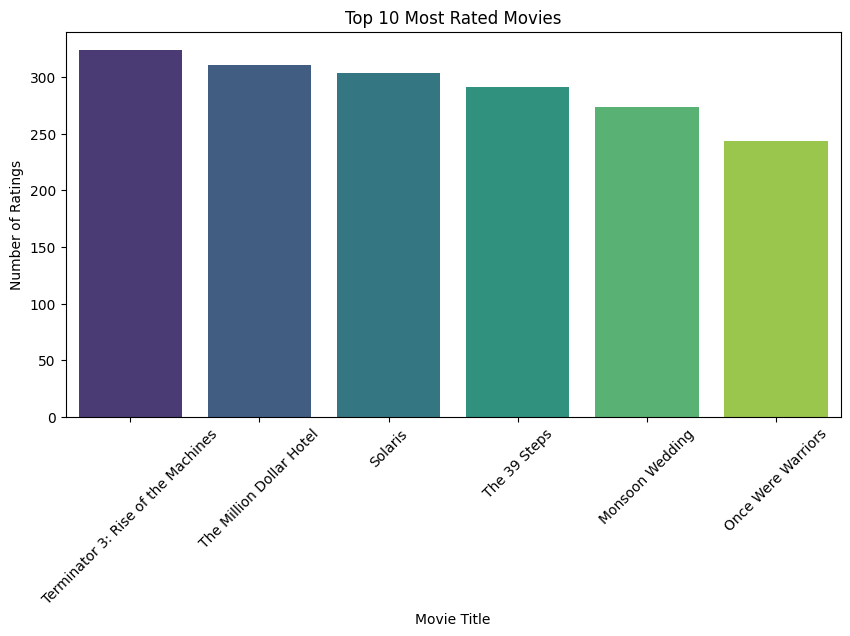

In [76]:
# Top 10 Most Rated Movies
top_movies= ratings.groupby('movieId').size().sort_values(ascending=False)[:10]
top_movies= top_movies.reset_index().merge(movies[['movieId', 'title']], on='movieId')
plt.figure(figsize=(10,5))
sns.barplot(x=top_movies['title'], y=top_movies[0], palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

# **Model Implimentation**

## 1. **Data Preprocessing**

In [77]:
print(ratings.isnull().sum())
print(movies.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      6
genres     0
dtype: int64


In [78]:
# Let's see the duplicate rows
duplicate_rows_ratings= ratings.duplicated().sum()
duplicate_rows_movies= movies.duplicated().sum()
print(f"Number of duplicate rows in ratings: {duplicate_rows_ratings}\n Number of duplicate rows in movies: {duplicate_rows_movies}")

Number of duplicate rows in ratings: 0
 Number of duplicate rows in movies: 30


In [79]:
# Drop duplicates
movies= movies.drop_duplicates()

In [80]:
# Drop the null values of two data set
# ratings.dropna(inplace=True)
# movies.dropna(inplace=True)

## **2. Implimentation**

In [81]:
# Train-Test Split
train,test= train_test_split(ratings,test_size=0.2,random_state=42)

# Use full dataset
user_movie_ratings= train.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Convert to sparse matrix
sparse_matrix= csr_matrix(user_movie_ratings.values)

# Collaborative Filtering (Matrix Factorization using SVD)
svd= TruncatedSVD(n_components=20, random_state=42)  # Reduced components for efficiency
matrix_svd= svd.fit_transform(sparse_matrix)

# KNN for Content-Based Filtering
knn= NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(matrix_svd)

# Evaluate Models
preds_svd= svd.inverse_transform(matrix_svd)
rmse_svd= np.sqrt(mean_squared_error(user_movie_ratings, preds_svd))

print(f'RMSE-SVD: {rmse_svd}')

RMSE-SVD: 0.34578502420460594


## **3. Test the model**

In [84]:
# Movie Recommendation Function
def recommend_movie(movie_name, n_recommendations=5):
    matched_movies= movies[movies['title'].str.contains(movie_name, case=False, na=False)]
    if matched_movies.empty:
        print("Movie not found in the dataset.")
        return []

    movie_index= matched_movies.index[0]
    distances,indices= knn.kneighbors([matrix_svd[movie_index]], n_neighbors=n_recommendations+1)
    recommended_movies= [movies.iloc[i]['title'] for i in indices.flatten()[1:]]

    print(f"Recommendations for '{movie_name}':")
    for i, rec in enumerate(recommended_movies, 1):
        print(f"{i}. {rec}")

# Example Usage
recommend_movie("Toy Story")

Recommendations for 'Toy Story':
1. The Fear
2. The Postman
3. Race the Sun
4. The Stars Fell on Henrietta
5. The Pallbearer
